# Исследование данных интернет-магазина игр «Стримчик».

В нашем распоряжении исторические данные интернет-магазина игр «Стримчик» о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**Цель исследования:**
1. Определить:
* Cколько игр выпускалось в разные годы?
* Как менялись продажи по платформам?
* Актуальный период продаж игр?
* Какие платформы лидируют по продажам, растут или падают?
* Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
* Что можно сказать о самых прибыльных жанрах? 


2. Составить портрет пользователя каждого региона:
* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?


3. Проверить гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?
* Средние пользовательские рейтинги жанров Action и Sports разные?


4. Сказать своё решение, по поводу рекламной компании на 2017 год.


**Ход исследования:**

1. В первую очередь, необходимо выгрузить все данные. Нам предоставляется один датафрейм: data,  в котором 16715 строк, 11 столбцов.


2. Вторым действием, необходимо предобработать данные - проверка наличия пропущенных значений, дубликатов, проверка на правильность выбранных типов данных. Также, все названия столбцов нужно привести к нижнему регистру, создать новый столбец и в него занести данные с посчитанными суммарными продажами. Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей.


3. Третьим действием, на основе предобработанных данных, мы исследуем основную информацию о количестве продаж, как меняли продажи по платформам, актуальный период продаж игр, какие платформы лидируют по продажам, какие падают, как влияют на продажи внутри одной популярной платформы, что можно сказать о прибыльных жанрах.


4. Четвертым действием, нам необходимо составить портрет пользователя каждого региона.


5. Пятым действием, мы проверяем гипотезы. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые? Средние пользовательские рейтинги жанров Action и Sports разные?


6. Общий вывод.

## Шаг 1. Загрузка данных

### Загрузка датафрейма.

1. Перед тем, как загружать датафрейм, необходимо загрузить нужные нам модули.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

pd.options.mode.chained_assignment = None

2. Выгружаем датафрейм с помощью метода read_csv().

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Выво:** мы удачно считали таблицу, выгрузили её и поместили в переменную 'data'.

### Изучение выгруженного датафрейма.

1. Для наглядности, выведем первые и последние 5 строк данного датафрейма.

In [3]:
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.tail(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


**Вывод:** в таблице присутствуют пропуски, названия столбцов выглядят некорректно, необходимо их будет заменить. Также, стоит подметить, что присутствуют нулевые значения, возможно, это аномалии, которых не должно быть.

2. Определим размерность нашего датафрейма.

In [5]:
data.shape

(16715, 11)

**Вывод:** текущий датафрейм состоит из 16715 строк и 11 столбцов.

3. Выведем основную информацию о данном датафрейме с помощью метода info().

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** во всех столбцах, кроме 'Platform', есть пропуски, которые необходимо будет изучить, и в случае чего, заменить / удалить. Также, в столбцах 'Year_Of_Release', 'Critic_Score', 'User_Score' выбраны неправильные типы данных, их нужно будет заменить.

4. Выведем общую информацию о данных типа 'float64' с помощью метода - describe()

In [7]:
data.describe().astype('float64')

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод:** по выведенным данным мы видим, что в столбцах 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales' - большую часть значений занимают нулевые значения, что очень подозрительно, необходимо будет изучить и исправить этот нюанс.

### Визуализация данных датафрейма.

1. С помощью метода hist() выведем возможные графики для визуализации.

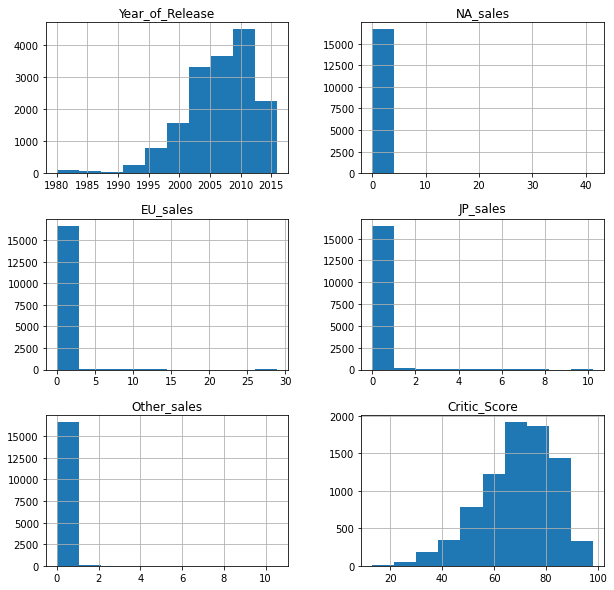

In [8]:
data.hist(figsize=(10,10));

**Вывод:** с помощью функции hist() было выведено 6 графиков на разные виды данных. По ним тяжело что-то сказать, так как данные еще не были преобработаны, поэтому метрики могут быть неточными.

## Шаг 2. Предобработка данных.

### Замена названий столбцов на правильный формат.

1. Ранее, было замечено, что большая часть столбцов записана в неправильном формате, необходимо все буквы в названиях привести в строчный формат. Для этого воспользуемся методом rename().

In [9]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
#data = data.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 'NA_sales':'na_sales','JP_sales':'jp_sales', 'EU_sales':'eu_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})
#data

**Вывод:** все названия некорректного формата были изменены на правильный формат. Можем начать предобрабатывать информацию.

### Предобработка данных столбца 'name'.

1. Для общего понимания, выведем первые 15 строк данного столбца.

In [11]:
data['name'].head(15)

0                      Wii Sports
1               Super Mario Bros.
2                  Mario Kart Wii
3               Wii Sports Resort
4        Pokemon Red/Pokemon Blue
5                          Tetris
6           New Super Mario Bros.
7                        Wii Play
8       New Super Mario Bros. Wii
9                       Duck Hunt
10                     Nintendogs
11                  Mario Kart DS
12    Pokemon Gold/Pokemon Silver
13                        Wii Fit
14             Kinect Adventures!
Name: name, dtype: object

**Вывод:** столбец 'name' отображает названия игр, тип данных выбран правильно, нужно проверить на пропуски и явные/неявные дубликаты.

2. С помощью метода isna() и sum() проверим столбец на пропуски.

In [12]:
data['name'].isna().sum()

2

**Вывод:** с помощью данных команд мы определили, что в столбце 'name' присутствует два пропуска.

3. В данном столбце присутствуют 2 пропуска. Так как этот столбец хранит названия игр, следовательно, без этой информации данные теряют релевантность. Корректного метода их замены - нет, поэтому удалим их.

In [13]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
data.dropna(subset=['name'], inplace=True)

In [15]:
data['name'].isna().sum()

0

**Вывод:** все пропуски в столбце 'name' были удалены, потому что мы не знаем, что было вместо пропусков, а без этой информации данные не имеют значения, так как название - ключевой фактор в данных. Скорей всего, данные были повреждены в ходе заполнения таблицы.

4. После удаления всех пропусков, проверяем столбец 'name' на явные дубликаты.

In [16]:
data['name'].duplicated().sum()

5154

**Вывод:** было обнаружено 5154 дубликата, судя по всему, они образовались из-за того, что в датафрейме присутствует столбец 'platform', все мы знаем, что большинство игр имеют версии как на компьютере, так и на различных приставках, поэтому в столбце 'name' и появляются дубликаты, их нельзя удалять, потому что, это очень важная информация, которая пригодится в будущем для анализа. 

5. Также, необходимо проверить столбец на неявные дубликаты. Это можно сделать с помощью метода unique().

In [17]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

**Вывод:** так как в столбце 'name' большое количество уникальных значений, методом проверки вручную проверить на неявные дубликаты будет тяжело. Поэтому воспользуемся параметром subset ('Имя' + 'Платформа') для определения одинаковых игр.

In [18]:
data.duplicated(subset=['name', 'platform']).sum()

4

**Вывод:** с помощью параметра subset мы смогли определить, что есть неявные дубликаты. Их всего четыре. Скорей всего, они были допущены при переносе БД. Все значения удалять не будем, оставим один, поэтому воспользуемся функцией drop_duplicates с параметром keep='last'.

In [19]:
data = data.drop_duplicates(subset=['name', 'platform'],keep='last')

In [20]:
data.duplicated(subset=['name', 'platform']).sum()

0

**Вывод:** в ходе предобработки данных в столбце 'name' + 'platform' было обнаружено 4 строки с неявными дубликатами. Все дубликаты удалять не стоит, оставим один дубликат, который по таблице расположен ниже (воспользовались методом keep='last'). Скорей всего, данные были повреждены при переносе данных из БД, возможно, данные отправляли несколькими 'пачками', и эти четыре дубликата были в каждой 'пачке'.

### Предобработка данных столбца 'platform'.

1. Для общего понимания, выведем первые 15 строк данного столбца.

In [21]:
data['platform'].head(15)

0      Wii
1      NES
2      Wii
3      Wii
4       GB
5       GB
6       DS
7      Wii
8      Wii
9      NES
10      DS
11      DS
12      GB
13     Wii
14    X360
Name: platform, dtype: object

**Вывод:** данный столбец отображает данные о том, на какой платформе (приставка/компьютер) игра. Тип данных выбран верно, данный столбец стоит проверить на наличие неявных дубликатов и пропусков. Явные дубликаты удалять не нужно, так как значения могут повторяться - различные игры могут быть на разных платформах.

2. Проверим данный столбец на наличие пропусков.

In [22]:
data['platform'].isna().sum()

0

**Вывод:** пропуски в данном столбце отстутствуют.

3. Проверим столбец на наличие неявных дубликатов с помощью метода unique().

In [23]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

**Вывод:** неявных дубликатов не найдено.

### Предобработка данных столбца 'year_of_release'.

1. Для общего понимания, выведем первые 15 строк данного столбца.

In [24]:
data['year_of_release'].head(15)

0     2006.0
1     1985.0
2     2008.0
3     2009.0
4     1996.0
5     1989.0
6     2006.0
7     2006.0
8     2009.0
9     1984.0
10    2005.0
11    2005.0
12    1999.0
13    2007.0
14    2010.0
Name: year_of_release, dtype: float64

**Вывод:** данный столбец отображает информацию о релизе игры. Поэтому, все значения должны иметь тип данных - 'int64', так как год - целое число. Также, столбец стоит проверить на наличие пропусков.

In [25]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


2. В первую очередь, проверим значения на пропуски с помощью метода isna().

In [26]:
data['year_of_release'].isna().sum()

269

**Вывод:** при занесении информации в столбце 'year_of_release' было пропущено 269 значений. Это 1.6% от всей информации. Мы можем удалить эти значения.

3. Удаление пропущенных значений.

In [27]:
data.dropna(subset=['year_of_release'], inplace=True)
data['year_of_release'].isna().sum()

0

**Вывод:** пропуски успешно были удалены.

4. Изменим тип данных данного столбца.

In [28]:
data['year_of_release'] = data['year_of_release'].astype('int64')

In [29]:
data['year_of_release'].describe().astype('int64')

count    16440
mean      2006
std          5
min       1980
25%       2003
50%       2007
75%       2010
max       2016
Name: year_of_release, dtype: int64

**Вывод:** тип данных столбца 'year_of_release' был успешно изменен на 'int64'.

### Предобработка данных столбца 'genre'.

1. Для общего понимания, выведем первые 15 строк данного столбца.

In [30]:
data['genre'].head(15)

0           Sports
1         Platform
2           Racing
3           Sports
4     Role-Playing
5           Puzzle
6         Platform
7             Misc
8         Platform
9          Shooter
10      Simulation
11          Racing
12    Role-Playing
13          Sports
14            Misc
Name: genre, dtype: object

**Вывод:** данный столбец отображет информацию жанре игры. Тип данных выбран верно, стоит проверить на неявные дубликаты. Явные дубликаты допустимы.

2. Проверим столбец на неявные дубликаты с помощью метода unique().

In [31]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

**Вывод:** данные в столбце 'genre' - корректны.

### Предобработка данных столбца 'na_sales'.

1. Для общего понимания, выведем первые 15 строк данного столбца.

In [32]:
data['na_sales'].head(15)

0     41.36
1     29.08
2     15.68
3     15.61
4     11.27
5     23.20
6     11.28
7     13.96
8     14.44
9     26.93
10     9.05
11     9.71
12     9.00
13     8.92
14    15.00
Name: na_sales, dtype: float64

**Вывод:** данный столбец отражает количество продаж игр в Северной Америке, тип данных выбран верно. Необходимо проверить значения на пропуски и аномалии.


2. Выведем общую информацию о хранящихся данных в столбце.

In [33]:
data['na_sales'].describe().astype('float64')

count    16440.000000
mean         0.263884
std          0.818343
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

**Вывод:** по выведенным данным, можем заметить, что 25% данных = 0, что очень подозрительно, нужно проверить на пропуски и нулевые значения. Максимальное значение ±41.4 млн. продаж может быть у популярных игр, например - GTA.

3. С помощью метода isna() определяем пропуски.

In [34]:
data['na_sales'].isna().sum()

0

**Вывод:** пропусков не найдено.

4. Выведем данные, где значения в данном столбце равны 0.

In [35]:
data[data['na_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.0,0.00,4.87,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009,Misc,0.0,0.00,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013,Role-Playing,0.0,0.00,3.44,0.00,NaN,NaN,NaN
403,English Training: Have Fun Improving Your Skills!,DS,2006,Misc,0.0,0.99,2.32,0.02,NaN,NaN,NaN
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,0.0,0.00,3.19,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.0,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.0,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.0,0.00,0.01,0.00,NaN,NaN,NaN


**Вывод:** такое часто бывает, когда игры выходят по тематике отдельного региона, поэтому в других регионах эти игры не популярны или вовсе не продаются. Поэтому мы можем объяснить нулевые значения в этом столбце. Предлагаю, данные с нулевыми значениями оставить, чтобы не изменить показатели.

**Вывод:** в столбце 'na_sales' было большое количество нулевых значений, заменять их не будем для избежания изменения показателей. Аномалий  не обнаружено. Тип данных выбран верно. На текущий момент данные корректны.

### Предобработка данных столбца 'eu_sales'.

1. Для общего понимания, выведем первые 15 строк данного столбца.

In [36]:
data['eu_sales'].head(15)

0     28.96
1      3.58
2     12.76
3     10.93
4      8.89
5      2.26
6      9.14
7      9.18
8      6.94
9      0.63
10    10.95
11     7.47
12     6.18
13     8.03
14     4.89
Name: eu_sales, dtype: float64

**Вывод:** столбец 'eu_sales' отображает количество продаж игры в европейском регионе. Необходимо будет изучить, аномалии, нулевые значения и пропуски в столбце.

2. Выведем общую информацию о данном столбце с помощью метода describe().

In [37]:
data['eu_sales'].describe().astype('float64')

count    16440.000000
mean         0.145887
std          0.506753
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

**Вывод:** минимальное значение - 0, 25% данных = 0, что очень подозрительно, максимальное значение ±29 млн. продаж. Среднее значение ±0.15.

3. С помощью метода isna() определяем пропуски.

In [38]:
data['eu_sales'].isna().sum()

0

**Вывод:** пропусков не найдено.

4. Выведем данные, где значения в данном столбце равны 0.

In [39]:
data[data['eu_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
148,Final Fantasy XII,PS2,2006,Role-Playing,1.88,0.0,2.33,1.74,92.0,7.6,T
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.00,0.0,4.87,0.00,NaN,NaN,NaN
268,Metal Gear Solid 3: Snake Eater,PS2,2004,Action,1.46,0.0,0.83,1.93,91.0,9.3,M
284,Half-Life,PC,1997,Shooter,4.03,0.0,0.09,0.00,96.0,9.1,M
316,Dragon Warrior III,NES,1988,Role-Playing,0.10,0.0,3.77,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.0,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.0,0.01,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.0,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.0,0.00,0.00,NaN,NaN,NaN


**Вывод:** такое часто бывает, когда игры выходят по тематике отдельного региона, поэтому в других регионах эти игры не популярны или вовсе не продаются. Поэтому мы можем объяснить нулевые значения в этом столбце. Предлагаю, данные с нулевыми значениями оставить, чтобы не изменить показатели на некорректные.

**Вывод:** в столбце 'eu_sales' большое количество нулевых значений, если мы их заменим на пропуски, показатели координально изменятся, заменять их нельзя. Аномалий в столбце не обнаружено, тип данных выбран верно. На текущий момент данные корректны.

### Предобработка данных столбца 'jp_sales'.

1. Для общего понимания, выведем первые 15 строк данного столбца.

In [40]:
data['jp_sales'].head(15)

0      3.77
1      6.81
2      3.79
3      3.28
4     10.22
5      4.22
6      6.50
7      2.93
8      4.70
9      0.28
10     1.93
11     4.13
12     7.20
13     3.60
14     0.24
Name: jp_sales, dtype: float64

**Вывод:** столбец 'jp_sales' отображает количество продаж игры в Японии. Необходимо будет изучить, аномалии, нулевые значения и пропуски в столбце, тип данных выбран верно.

2. Выведем общую информацию о хранящихся данных в столбце.

In [41]:
data['jp_sales'].describe().astype('float64')

count    16440.000000
mean         0.078503
std          0.311136
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

**Вывод:** минимальное значение - 0, 25% данных = 0, что очень подозрительно, максимальное значение ±10.2 млн. продаж. Среднее значение ±0.07.

3. С помощью метода isna() определяем пропуски.

In [42]:
data['jp_sales'].isna().sum()

0

**Вывод:** пропусков не найдено.

4. Выведем данные, где значения в данном столбце равны 0.

In [43]:
data[data['jp_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
61,Just Dance 3,Wii,2011,Misc,5.95,3.11,0.0,1.06,74.0,7.8,E10+
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.0,0.60,86.0,7.6,T
89,Pac-Man,2600,1982,Puzzle,7.28,0.45,0.0,0.08,NaN,NaN,NaN
100,Call of Duty: World at War,X360,2008,Shooter,4.81,1.88,0.0,0.69,84.0,7.6,M
103,Just Dance,Wii,2009,Misc,3.48,2.99,0.0,0.73,49.0,8,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.0,0.00,NaN,tbd,T
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.0,0.00,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.0,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.0,0.00,NaN,NaN,NaN


**Вывод:** такое часто бывает, когда игры выходят по тематике отдельного региона, поэтому в других регионах эти игры не популярны или вовсе не продаются. Поэтому мы можем объяснить нулевые значения в этом столбце. Предлагаю, данные с нулевыми значениями оставить, чтобы не изменить показатели на некорректные.

**Вывод:** в столбце 'jp_sales' большое количество нулевых значений, если мы их заменим на пропуски, показатели координально изменятся, заменять их нельзя. Аномалий в столбце не обнаружено, тип данных выбран верно. На текущий момент данные корректны.

### Предобработка данных столбца 'other_sales'.

1. Для общего понимания, выведем первые 15 строк данного столбца.

In [44]:
data['other_sales'].head(15)

0     8.45
1     0.77
2     3.29
3     2.95
4     1.00
5     0.58
6     2.88
7     2.84
8     2.24
9     0.47
10    2.74
11    1.90
12    0.71
13    2.15
14    1.69
Name: other_sales, dtype: float64

**Вывод:** столбец 'other_sales' отображает количество продаж игр в других странах, которых нет в таблице. Необходимо будет изучить, аномалии, нулевые значения и пропуски в столбце, тип данных выбран верно.

2. Выведем общую информацию о хранящихся данных в столбце.

In [45]:
data['other_sales'].describe().astype('float64')

count    16440.00000
mean         0.04754
std          0.18796
min          0.00000
25%          0.00000
50%          0.01000
75%          0.03000
max         10.57000
Name: other_sales, dtype: float64

**Вывод:** минимальное значение - 0, 25% данных = 0, что очень подозрительно, максимальное значение ±10.5 млн. продаж. Среднее значение ±0.048.

3. С помощью метода isna() определяем пропуски.

In [46]:
data['other_sales'].isna().sum()

0

**Вывод:** пропусков не найдено.

4. Выведем данные, где значения в данном столбце равны 0.

In [47]:
data[data['other_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
138,World of Warcraft,PC,2004,Role-Playing,0.08,6.21,0.00,0.0,93.0,7.3,T
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.00,0.00,4.87,0.0,NaN,NaN,NaN
284,Half-Life,PC,1997,Shooter,4.03,0.00,0.09,0.0,96.0,9.1,M
288,World of Warcraft: The Burning Crusade,PC,2007,Role-Playing,2.57,1.52,0.00,0.0,91.0,7.9,T
316,Dragon Warrior III,NES,1988,Role-Playing,0.10,0.00,3.77,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN


**Вывод:** такое часто бывает, когда игры выходят по тематике отдельного региона, поэтому в других регионах эти игры не популярны или вовсе не продаются. Поэтому мы можем объяснить нулевые значения в этом столбце. Предлагаю, данные с нулевыми значениями оставить, чтобы не изменить показатели на некорректные.

**Вывод:** в столбце 'other_sales' большое количество нулевых значений, если мы их заменим на пропуски, показатели координально изменятся, заменять их нельзя. Аномалий в столбце не обнаружено, тип данных выбран верно. На текущий момент данные корректны.

### Предобработка данных столбца 'critic_score'.

1. Для общего понимания, выведем первые 15 строк данного столбца.

In [48]:
data['critic_score'].head(15)

0     76.0
1      NaN
2     82.0
3     80.0
4      NaN
5      NaN
6     89.0
7     58.0
8     87.0
9      NaN
10     NaN
11    91.0
12     NaN
13    80.0
14    61.0
Name: critic_score, dtype: float64

**Вывод:**  столбец 'critic_score' отображает информацию об оценках критиков по играм. Необходимо проверить правильность типа данных, аномалии и пропуски. 

2. Выведем общую информацию с помощью метода describe().

In [49]:
data['critic_score'].describe().astype('float64')

count    7979.000000
mean       68.992480
std        13.917979
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

**Вывод:** минимальное значение в данном столбце - 13, среднее значение - ~68, максимальное - 98.

3. Проверим столбец на наличие пропусков с помощью метода isna().

In [50]:
data['critic_score'].isna().sum()

8461

**Вывод:** в столбце 8461 пропуск, что примерно равно около половины от всех данных. Скорей всего, данные не были занесены в таблицу или были утеряны. Я предлагаю не трогать данные.

### Предобработка данных столбца 'user_score'.

1. Для общего понимания, выведем первые 15 строк данного столбца.

In [51]:
data['user_score'].head(15)

0       8
1     NaN
2     8.3
3       8
4     NaN
5     NaN
6     8.5
7     6.6
8     8.4
9     NaN
10    NaN
11    8.6
12    NaN
13    7.7
14    6.3
Name: user_score, dtype: object

**Вывод:**  столбец 'user_score' отображает информацию об оценках игроков. Необходимо проверить аномалии и пропуски. Также, стоит уделить внимание значению 'tbd'. Тип данных выбран верно.

2. Изучим значения аббревиатуры 'tbd'.
- 'tbd' - расшифровывается, как 'To Be Determined', то есть «Будет определено». Игрок играет в эту игру и еще не оценил её. Поэтому значение 'tbd' можно заменить на пропуск, чтобы значение не влияло на другие показатели.

In [52]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = None

**Вывод:** значение 'tbd' было заменено на пропуск.

3. Проверим данный столбец на нулевые значения.

In [53]:
data[data['user_score'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Вывод:** нулевые значения отсутствуют.

4. Изменим тип данных с 'object' на 'float64'.

In [54]:
data['user_score'] = data['user_score'].astype('float64')

### Предобработка данных столбца 'rating'.

1. Для общего понимания, выведем первые 15 строк данного столбца.

In [55]:
data['rating'].head(15)

0       E
1     NaN
2       E
3       E
4     NaN
5     NaN
6       E
7       E
8       E
9     NaN
10    NaN
11      E
12    NaN
13      E
14      E
Name: rating, dtype: object

**Вывод:**  столбец 'rating' отображает информацию о возрастном рейтинге игры. Необходимо узнать уникальные значения данного столбца и посмотреть неявные дубликаты. Тип данных выбран верно.

2. Узнаем уникальные значения, по возможности выявим неявные дубликаты.

In [56]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Вывод:** неявных дубликатов нет, удалять пропуски не стоит.

3. Узнаем, какое количество пропущенненых значений.

In [57]:
data['rating'].isna().sum()

6676

**Вывод:** 6676 пропусков в столбце - это большое значение, которое в дальнейшем при составлении графиков может изменить показатели.

4. Заменим нулевые значения на значение 'NR' - No Rating. 

In [58]:
data['rating'] = data['rating'].fillna('NR')

**Вывод:** столбец 'rating' отражает возрастной рейтинг, в этом столбце было большое количество пропущенных значений, возможно, это связано с тем, что данные просто не заполнили или, есть вариант того, что в разных регионах используются рейтинги, которых нет в других регионах и этого в таблице не учтено. Поэтому мною было принято решение, заменить пропущенные значения на 'NR' (No Rating).

### Суммарные продажи во всех регионах. 

In [59]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NR
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NR
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NR


In [60]:
data['sum_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [61]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NR,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NR,0.01


**Вывод по разделу:** в данном шаге, разделе мы предобработали все столбцы в данном датафрейме. Были изменены названия столбцов на правильный формат, были выявлены пропуски, которые стоило удалить (столбцы 'name' и 'year_of_release'). Большая часть нулевых значений были заменены на пропуски (столбцы, связанные с продажами и оценками), для того, чтобы максимально точно анализировать данные в дальнейшем.

## Шаг 3.  Исследовательский анализ данных.

### Сколько игр выпускалось в разные годы?

1. Для того, чтобы определить количество игр в разные годы, создадим сводную таблицу по столбцу 'year_of_release'.

In [62]:
data_num_games = pd.pivot_table(data,
                               index='year_of_release',
                               values='name',
                               aggfunc='count').sort_values(by='name', ascending=False)
data_num_games = data_num_games.rename(columns={'name':'count_games'})
data_num_games

,count_games
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1005
2005,938
2002,829
2003,775


**Вывод:** В таблице много значений и сложно оценивать, поэтому визуализируем данные, но по первому взгляду, мы видим, что в 2008 году было наибольшее количество выпусков игр, 2009 на одну игру меньше, далее идут 2010, 2007, 2011. Самое малое количество игр было выпущено в период с 1980 - 1990 годы.

2. Для наглядности стоит визуализировать данную таблицу.

Text(0.5, 1.0, 'Количество выпущенных игр по годам')

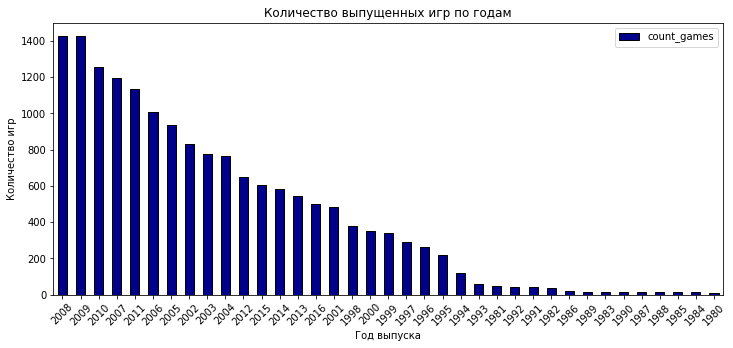

In [63]:
data_num_games.plot(kind='bar', rot=45, figsize=(12,5), edgecolor='black', color='darkblue')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Количество выпущенных игр по годам')

**Вывод:** по графику видно, что 2008 год - самый насыщенный год по выпуску игр. Также, на одну игру меньше было создано в 2009 году. Дальше идут 2010, 2007, 2011 годы и т.д. Меньше всего было создано игр в период от 1980-1990 годы, это обусловлено тем, что игровая индустрия была еще на этапе развития, возможно, не хватало ресурсов для создания качественных игр, и поэтому эта индустрия была не так популярна. 

3. Стоит посмотреть сезонность, в какие периоды выпуск игр был востребован.

In [64]:
data_num_games_non = pd.pivot_table(data,
                               index='year_of_release',
                               values='name',
                               aggfunc='count')
data_num_games_non = data_num_games_non.rename(columns={'name':'count_games'})


Text(0.5, 1.0, 'Количество выпущенных игр по годам')

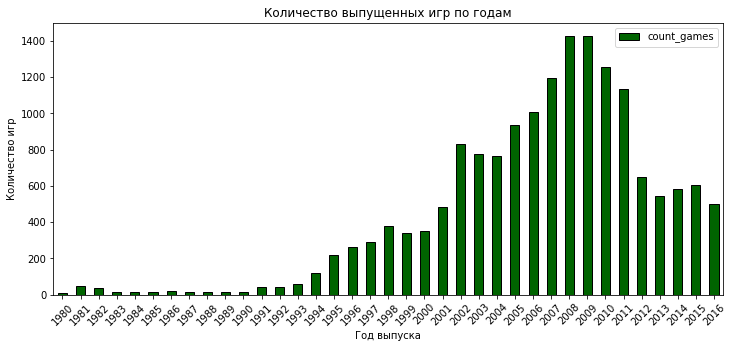

In [65]:
data_num_games_non.plot(kind='bar', rot=45, figsize=(12,5), edgecolor='black', color='darkgreen')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Количество выпущенных игр по годам')

**Вывод:** по графику видно, что в период с 1980 - 1990 рынок игр не был востребован, выпускалось малое количество игр. С 1991 года мы видим заметный рост выпуска игр и в течение 7 лет количество игр только увеличивалось. В период с 1999 - 2000 год выпускалось меньше чем в 1998, но тоже значительное количество. С 2001 - 2005 колоссальный всплеск, который не перестает увеличиваться. К 2008 году индустрия достигает пика, рынок перенасыщен и поэтому в следующие годы количество выпусков игр уменьшается. К 2016 году индустрия возвращается по уровню выпуска к 2001 году.

4. Важны ли данные за все периоды?
**Ответ:** По моему мнению, данные за все периоды важны, так как с их помощью мы можем отслеживать тенденцию развития игровой индустрии.

### Продажи по платформам.

1. Создадим сводную таблицу, первым столбцом будет 'platform' - по нему будут группироваться данные, а вторым столбцом будет столбец 'sum_sales'. 

In [66]:
all_platform_and_total_sales = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)

2. Для визуализации данных, рисуем график.

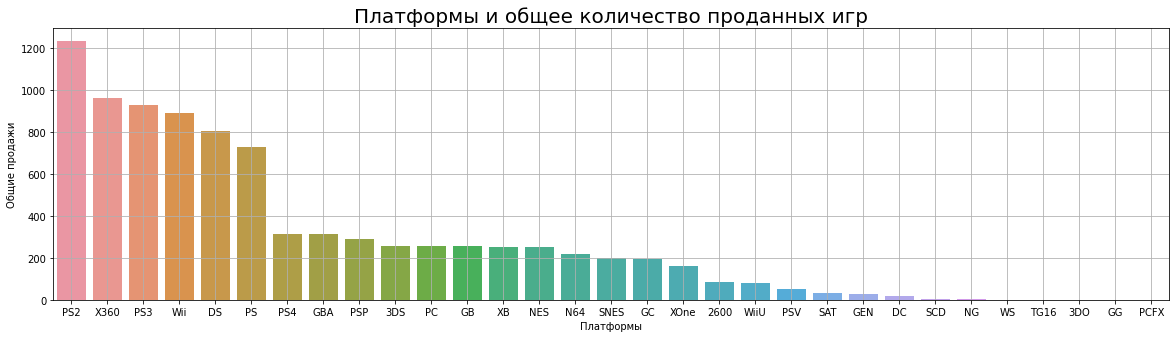

In [67]:
plt.figure(figsize=(20, 5))
plt.title('Платформы и общее количество проданных игр', fontsize=20)
sns.barplot(x=all_platform_and_total_sales.index, y=all_platform_and_total_sales['sum_sales'])
plt.ylabel('Общие продажи')
plt.xlabel('Платформы')
plt.grid(True);

**Вывод:** по выведенному графику видно, что 6 видов платформ явно выделяются по отношению к другим - это PS2, X360, PS3, Wii, DS, PS.

3. Визуализируем данные по этим 6 видам.

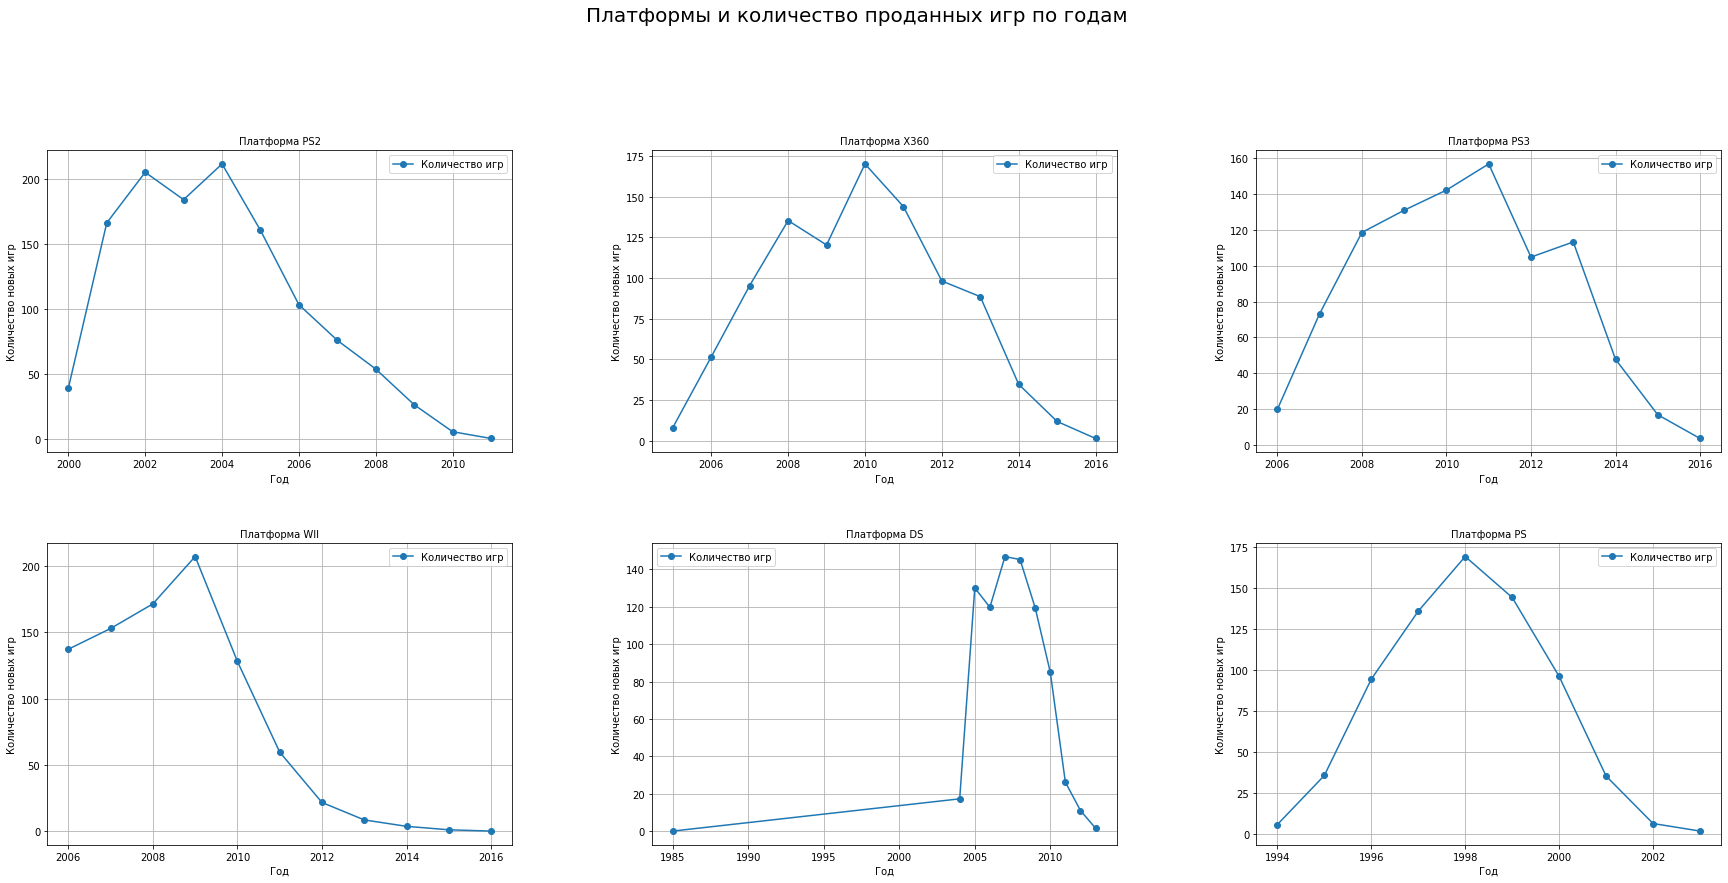

In [68]:
position = 0
top_platform = all_platform_and_total_sales.reset_index()['platform'].head(6)
plt.figure(figsize=[30, 20])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('Платформы и количество проданных игр по годам', fontsize=20)
for name_of_platform in top_platform:
    position += 1
    pvt = data.query('platform == @name_of_platform').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
    plt.subplot(3, 3, position)
    plt.title(f'Платформа {name_of_platform.upper()}', fontsize=10)
    plt.plot(pvt, 'o-', label='Количество игр', alpha=1)
    plt.ylabel('Количество новых игр')
    plt.xlabel('Год')
    plt.grid(True)
    plt.legend()
plt.show();

4. В графике с платформой DS, был замечен выброс. Приставка вышла в 2004 году, а на графике мы видим значение 1985 год. Необходимо удалить данный выброс.

In [69]:
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NR,0.02


In [70]:
data = data.drop(15957).reset_index(drop=True)

5. Вновь нарисуем корректные графики.

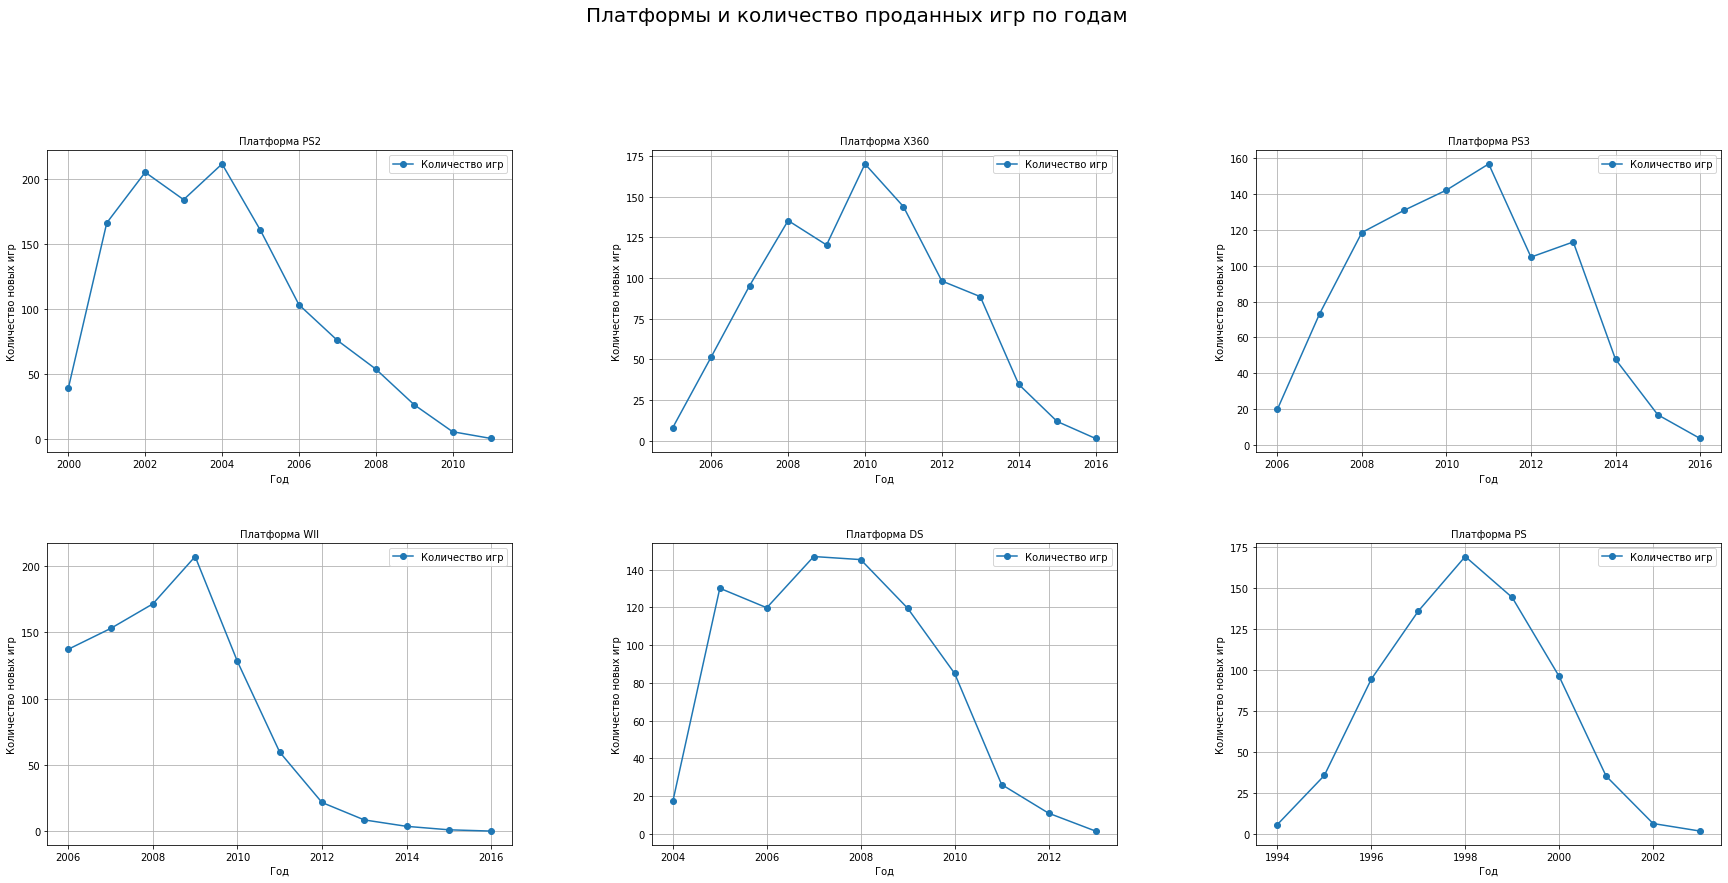

In [71]:
position = 0
top_platform = all_platform_and_total_sales.reset_index()['platform'].head(6)
plt.figure(figsize=[30, 20])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('Платформы и количество проданных игр по годам', fontsize=20)
for name_of_platform in top_platform:
    position += 1
    pvt = data.query('platform == @name_of_platform').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
    plt.subplot(3, 3, position)
    plt.title(f'Платформа {name_of_platform.upper()}', fontsize=10)
    plt.plot(pvt, 'o-', label='Количество игр', alpha=1)
    plt.ylabel('Количество новых игр')
    plt.xlabel('Год')
    plt.grid(True)
    plt.legend()
plt.show();

**Вывод:** 
- Первый график отображает информацию по годам о количестве проданных игр на платформе PS2. Мы видим, как с 2000 по 2004 год увеличивается выпуск игр на данной платформе, к 2004 году достигается пик, после которого количество проданных уменьшается. В 2006 году выходит приставка PS3, которая полностью заменяет PS2 и её актуальность сильно падает, к 2010 году, количество проданных игр стремится к 0.


- Второй график отображает информацию по годам о количестве проданных игр на платформе XBOX 360. Дата выхода приставки - 2005 год, с этого момента увеличивается количество выпущенных новых игр. К 2010 достигается пик, после которого продажа игр уменьшается, возможно, это связано с тем, что в 2010 году начали появлятся слухи о выходе приставки нового поколения, а в 2013 - выходит XBOX ONE. Который заменяет старое поколение и к 2016 году количество проданных игр на XBOX 360 равно 0.


- Третий график отображает информацию по годам о количестве проданных игр на платформе PS3. Мы видим, как с 2006 по 2011 год увеличивается количество проданных игр. В 2011 году - пик, количество проданных игр становится меньше. В 2013 году выходит новое поколение консолей - PS4, после которого количество проданных игр на PS3 значительно уменьшается. К 2016 количество проданных игр стремится к 0.


- Четвертый график отображает информацию по годам о количестве проданных игр на платформе Nintendo Wii. Дата выхода приставки - 2006 год, с этого момента количество проданных увеличивается. Так как приставка была не так популярна, её пик пришёлся через 3 года после выпуска - 2009 год. После этого момента количество проданных стремительно уменьшается. к 2016 году количество проданных равно около 0.


- Пятый график отображает информацию по годам о количестве проданных игр на платформе Nintendo DS. Дата выхода приставки - 2004 год, с этого момента количество проданных игр увеличивается. Пик популярности продажи игр пришёлся на 2008 год, с этого момента количество проданных игр стремительно начала падать. К 2017 году количество проданных игр равно около 0.


- Шестой график отображает информацию по годам о количестве проданных игр на платформе PS. В 1994 году выходит приставка и количество игр стремительно растёт. К 1998 году популярность приставки достигает пика, после которого количество проданных игр уменьшается. К 2001 году количество проданных стремится к 0.

4. Вычислим характерный срок появляются новые и исчезают старые платформы.

In [72]:
list_with_life_cycle_of_consoles = []
for name_platform in top_platform:
    life_cycle = data.query('(platform == @name_platform)').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').count()
    list_with_life_cycle_of_consoles.append(life_cycle)
mean_life_cycle = int(np.mean(list_with_life_cycle_of_consoles))
print(f'\n Характерный срок, за который появляются новые и исчезают старые платформы - {mean_life_cycle} лет')


 Характерный срок, за который появляются новые и исчезают старые платформы - 11 лет


**Вывод:** характерный срок, за который появляются новые и исчезают старые платформы - 11 лет. Также, стоит подметить, что у всех приведенных графиков есть тенденция спада к 2016 году. 

### Определение актульного периода. 

Из графика, который в пункте 3.1, видно, что в 2012 - 2016 годы не видно скачков, показатели примерно на одном уровне, и поэтому я предлагаю сделать этот период - актуальным. Данные за этот период смогут построить прогноз на 2017 год.

### Какие платформы лидируют по продажам, растут или падают? 

1. В прошлом пункте было предложено определить период 2012 - 2016 актуальным. Поэтому сделаем срез с помощью метода query() и выведем показатели с 2012 по 2016 годы.

In [73]:
data_actual_years = data.query('year_of_release > 2011')

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Очень хорошо, что результат запроса/’среза’ ты присваиваешь новому датафрейму. Таким образом оригинальный датафрейм ты оставляешь нетронутым, не перезаписываешь (вдруг нам опять понадобятся данные из него чуть ниже). Это верное решение. Best practice. Молодец!</div>

2. С помощью метода len() и unique() вычислим общее количество платформ по актуальному периоду.

In [74]:
num_platforms_each_year = len(data_actual_years['platform'].unique())

3. Визуализируем результат вычислений.

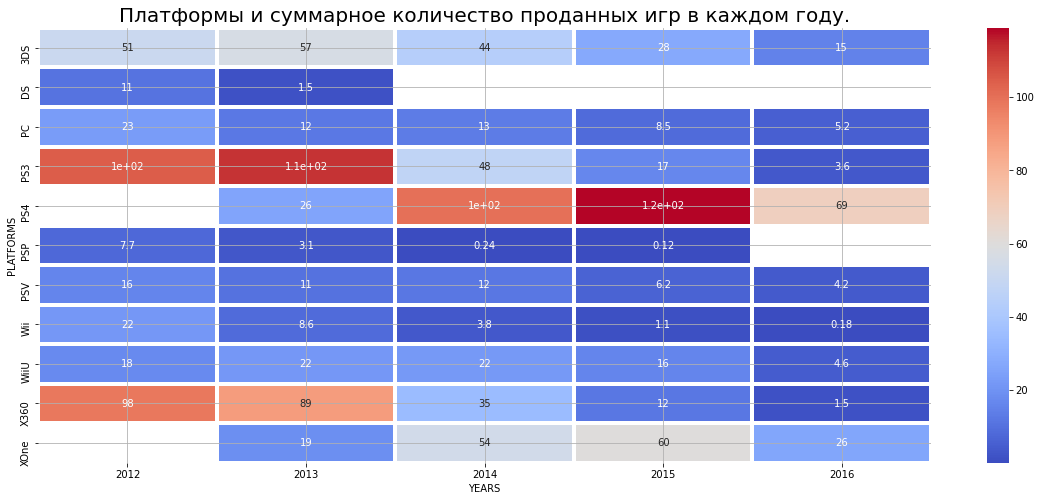

In [75]:
plt.figure(figsize=(20, 8))
plt.title('Платформы и суммарное количество проданных игр в каждом году.', fontsize=20)
(sns
 .heatmap(data_actual_years.pivot_table(index='platform', columns='year_of_release', values='sum_sales', aggfunc='sum'), annot=True, cmap="coolwarm",linewidths=3))
plt.ylabel('PLATFORMS')
plt.xlabel('YEARS')
plt.grid(True);

**Вывод:** по выведенному графику видно:
- Nintendo 3DS в 2012 начала набирать популярность, к 2013 году приставка достигла пика популярности, после которого количество проданных игр начало заметно уменьшаться, к 2016 году было продано 15 млн. игр, что относительно мало по сравнению с другими годами. Но стоит отметить, что показатели продаж довольно высокие, так что можно рассчитывать на то, что в течение нескольких лет продажа игр на эту приставку будет приносить прибыль.


- Nintendo DS - была одна из самых популярных приставок с 2005 по 2010 годы. По графику мы видим, что количество проданных игр с 2012 - 2013 сильно упало, а после 2014 и вовсе продажа игр на данную приставку прекратились. После 2016 года, данная приставка не будет популярно, поэтому, данная приставка не будет прибыльной. 


- PC - популярность данной платформы с 2012 года по 2016 заметно падает (с 23 млн. продаж до 5.2 млн.), но количество проданных экземпляров значительное, поэтому стоит рассмотреть данную платформу для продаж - она будет прибыльной. Также, стоит отметить, что у персональных компьютеров нет моделей, поэтому актуальность этой платформы будет всегда.


- PS3 - в 2012 и 2013 годы, приставка является самой популярной по количеству проданных игр, но в 2013 году появляется PS4, которая заменяет PS3, и популярность её сходит на нет, это прекрасно видно по графику. Не стоит продавать игры на данную приставку, так как вскоре приставка и сами игры станут не актуальны.


- PS4 - была выпущена в 2013 году, поэтому график начинается именно с этого года до 2016 года, приставка набирает обороты, увеличивая количество продаж. В 2016 году количество проданных игр уменьшилось, но их по-прежнему большое количество. Также, стоит отметить, что в 2017 году эта приставка будет являеться актуальной, так как на этот год не запланировано выпуска новой приставки. Для компании продажа игр на данную площадку будет выгодной.


- PSP - была популярна до 2012 года. С 2012 года по графику видно, что количество проданных игр значительно уменьшается. А в 2016 и вовсе прекращается. В дальнейшем игры на данную площадку будут не актуальны и не выгодны для компании.


- PSV - была выпущена в 2011 году. Мы видим, что в 2012 году был пик продаж, после которого количество проданных игр значительно начало уменьшаться (с 16 млн. продаж до 4.2 млн.), скорей всего, эта тенденция продолжится. Но стоит отметить, что количество проданных игр в 2016 все еще значительно, так что, компании стоит продолжать продавать игры, но рассчитывать только на короткий промежуток времени.


- Приставка Nintendo Wii - была популярная с 2006 по 2012 годы. По графику мы видим, что с 2012 года количество резко начинает падать. А к 2016 количество проданных игр достигает малого количества (180 тыс.). Предпалагю, что в следущие годы количество проданных игр будет только уменьшаться, что не выгодно для компании.


- Приставка Nintendo WiiU - 2012 выход в свет данной приставки. С 2012 - 2014 приставка набирает обороты по продаже игр. Но с 2015 количество проданных игр начинает заметно уменьшаться, а в 2016 году ходят слухи о новой приставке, которая заменит Nintendo WiiU. Но в течение нескольких лет приставка все еще будет актуальна, так как мы видим, что продажи все еще значительные. 


- Приставка XBOX 360 была выпущена в 2007 году. По прошлым графикам мы видим, что 2010 год был пиком продаж. В 2012 году количество проданных игр по-прежнему значительное, но продажи падают. К 2016 году количество проданных игр достигает минимума и в дальнейшем, количество продаж будет только падать, так как приставка уже не актуально, её место занял XBOX One. 


- Приставка XBOX One была выпущена в 2013 году с этого момента начинает набирать обороты оп продажам, к 2015 достигает пика и количество продаж начинает уменьшаться. В 2016 году - 26 млн. проданных игр, достаточно большое количество, данная приставка будет еще актуально в следующих годах, поэтому игры на неё следует продавать в дальнейшем.

**Потенциально прибыльные платформы:**
- PC
- PS4
- XBOX One
- Nintendo 3DS
- Nintendo WiiU

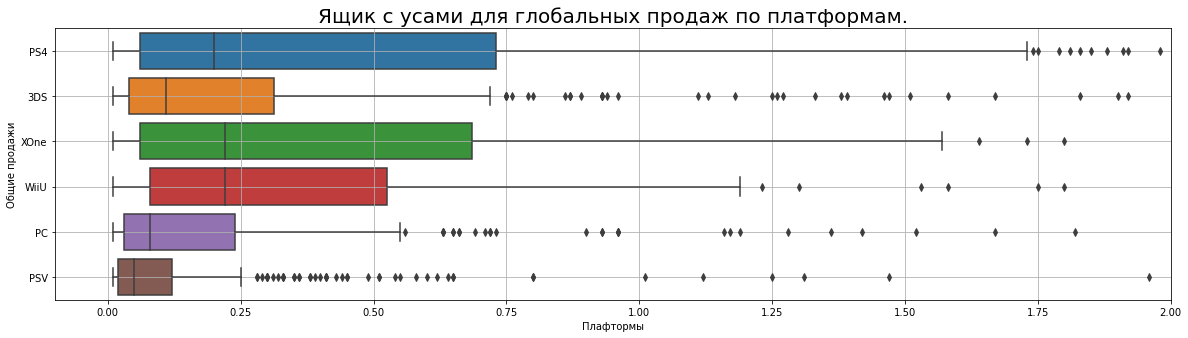

In [76]:
list_with_promising_platforms = ['PS4', 'XOne', 'WiiU', '3DS', 'PC', 'PSV']
potential_platforms = data_actual_years[data_actual_years['platform'].isin(list_with_promising_platforms)]

plt.figure(figsize=(20, 5))
plt.xlim(-0.1, 2)
plt.title('Ящик с усами для глобальных продаж по платформам.', fontsize=20)
sns.boxplot(x='sum_sales', y='platform', data=potential_platforms)
plt.ylabel('Общие продажи')
plt.xlabel('Плафтормы')
plt.grid(True);


**Вывод:** по выведенному графику видно, что PS4, XOne, WiiU серьезно опережают другие приставки по продажам - это видно по разбросу. Больше всего продается игр на приставке PS4. Также, стоит отметить, что в следствие большого разброса больше и медианные значения у лидеров по продажам. 

### Влияние отзывов и критиков на продажи игр на PS4.


1. Создадим датафрейм, в котором будет четыре столбца - 'platform' (только PS4), 'critic_score', 'user_score', 'sum_sales'.

In [77]:
data_scores = data_actual_years[['platform', 'critic_score', 'user_score', 'sum_sales', 'year_of_release']]
data_scores_ps4 = data_scores[data_scores['platform'] == 'PS4']
data_scores_ps4

,platform,critic_score,user_score,sum_sales,year_of_release
31,PS4,NaN,NaN,14.63,2015
42,PS4,97.0,8.3,12.62,2014
77,PS4,82.0,4.3,8.58,2015
87,PS4,NaN,NaN,7.98,2015
92,PS4,83.0,5.7,7.66,2014
...,...,...,...,...,...
16225,PS4,69.0,7.5,0.01,2016
16228,PS4,NaN,NaN,0.01,2016
16250,PS4,61.0,7.9,0.01,2016
16254,PS4,51.0,5.5,0.01,2016


2. Визуализируем данные. Нарисуем диаграмму рассеивания.

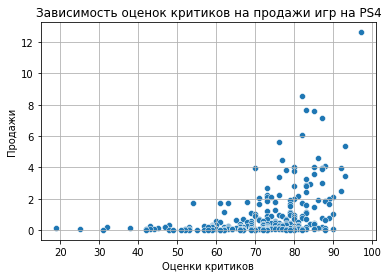

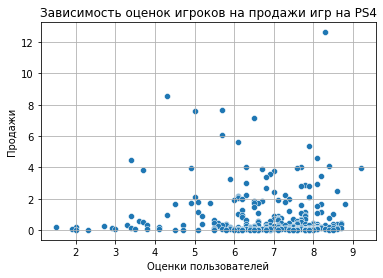

In [78]:
critic_scores = data_scores_ps4['critic_score']
user_scores = data_scores_ps4['user_score']
sales = data_scores_ps4['sum_sales']

sns.scatterplot(x=critic_scores, y = sales, data=data_scores_ps4)
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.grid(True)
plt.title('Зависимость оценок критиков на продажи игр на PS4')

plt.show()

sns.scatterplot(x=user_scores, y = sales, data=data_scores_ps4)
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.grid(True)
plt.title('Зависимость оценок игроков на продажи игр на PS4')

plt.show()


3. Определим корреляции, влияние отзывов на продажи.

In [79]:
data_scores_ps4['sum_sales']. corr(data_scores_ps4['critic_score'])

0.406567902061781

In [80]:
data_scores_ps4['sum_sales']. corr(data_scores_ps4['user_score'])

-0.031957110204556376

**Вывод:** из выведенных графиков и подсчётов корреляций, мы видим, что продажи игр на приставку PS4 коррелируют с отзывами критиков, мы видим умеренную прямую корреляцию. Зависимости между отзывами пользователей и количество продаж игр - не наблюдается.

### Влияние отзывов пользователей и критиков на продажи игр на других платформах.

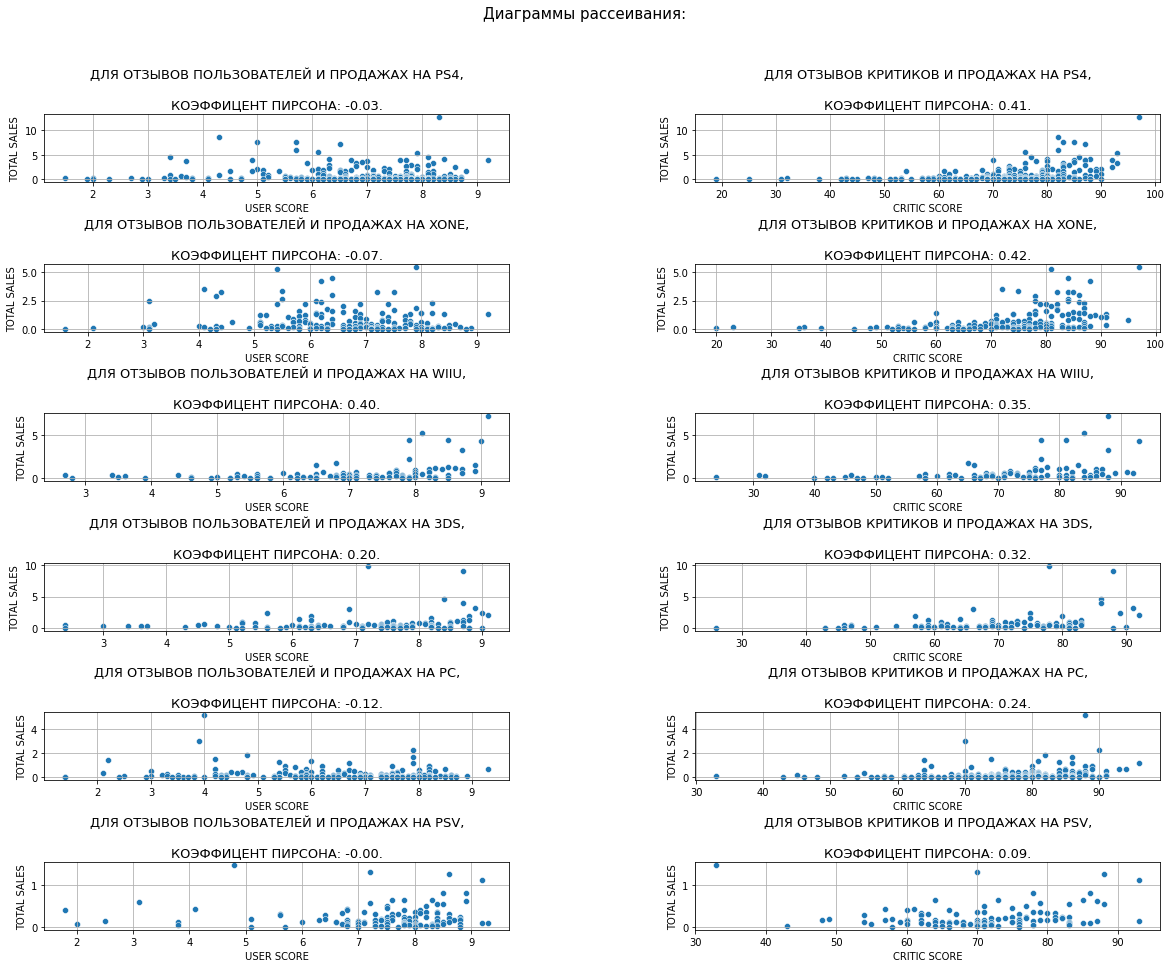

In [81]:
position = 0
plt.figure(figsize=[20,15])
plt.subplots_adjust(wspace=0.4, hspace=1.2)
plt.suptitle('Диаграммы рассеивания:', fontsize=15)

for name_of_platform in list_with_promising_platforms:
    position += 1
    df_for_console = potential_platforms[(potential_platforms['platform'] == name_of_platform) & (potential_platforms['user_score'] != 0) & (potential_platforms['user_score'] != -1)]
    
    plt.subplot(6, 2, position)
    cor_with_user_score = df_for_console['sum_sales'].corr(df_for_console['user_score'])
    plt.title(f'ДЛЯ ОТЗЫВОВ ПОЛЬЗОВАТЕЛЕЙ И ПРОДАЖАХ НА {name_of_platform.upper()},\n\nКОЭФФИЦЕНТ ПИРСОНА: {cor_with_user_score:.2f}.', fontsize=13)
    sns.scatterplot(x='user_score', y='sum_sales', data=df_for_console)
    plt.xlabel('USER SCORE')
    plt.ylabel('TOTAL SALES')
    plt.grid(True)
    
    position += 1
    plt.subplot(6, 2, position)
    cor_with_critic_score = df_for_console['sum_sales'].corr(df_for_console['critic_score'].astype('float32'))
    plt.title(f'ДЛЯ ОТЗЫВОВ КРИТИКОВ И ПРОДАЖАХ НА {name_of_platform.upper()},\n\nКОЭФФИЦЕНТ ПИРСОНА: {cor_with_critic_score:.2f}.', fontsize=13)
    sns.scatterplot(x='critic_score', y='sum_sales', data=df_for_console)
    plt.xlabel('CRITIC SCORE')
    plt.ylabel('TOTAL SALES')
    plt.grid(True);

**Вывод:** между оценками критиков и продажами наблюдается прямая, но средне-слабая корреляция. Однако оценки пользователей не имеют корреляции с продажами.

### Общее распределение игр по жанрам

1. Создадим сводную таблицу, главным столбом будет - жанр, а вторым столбцом - количество продаж. 

In [82]:
potential_platforms
genre_sales = pd.pivot_table(potential_platforms,
                            index='genre',
                            values='sum_sales').sort_values(by='sum_sales', ascending=False)
genre_sales

,sum_sales
genre,
Shooter,1.262059
Platform,0.807188
Sports,0.677535
Role-Playing,0.562710
Simulation,0.549474
Fighting,0.502857
Racing,0.465556
Action,0.344606
Misc,0.330078


2. Для наглядности, визуализируем данные. Изобразим столбчатую диаграмму.

Text(0.5, 1.0, 'Распределение количества продаж игр по жанрам')

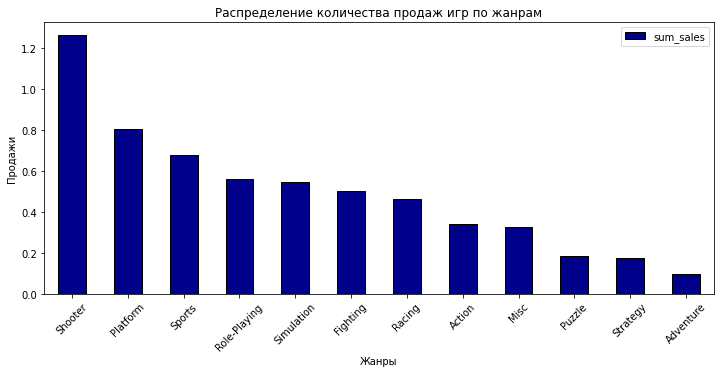

In [83]:
genre_sales.plot(kind='bar', rot=45, figsize=(12,5), edgecolor='black', color='darkblue')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.title('Распределение количества продаж игр по жанрам')

**Вывод:** самые популярные жанры: 'Shooter' (сильно выделяется по отношению к другим), 'Platform', 'Sports', 'Role-Playing', 'Simulation'. Самым не популярным является жанр: 'adventure'.

**Общий вывод по разделу:** в данном разделе мы узнали, что: 
- Самый популярный год по выпуску игр - 2008 год.
- На приставки PS2, X360, PS3, Wii, DS, PS - было продано больше всего игр.
- Актуальный период приставок - 11 лет.
- Потенциально прибыльные приставки: PC, PS4, XBOX, OneNintendo, 3DSNintendo, WiiU, PSV.
- Количество продаж сильно зависит от оценок критиков.
- Самые популярные жанры по продажам - 'Shooter' (сильно выделяется по отношению к другим), 'Platform', 'Sports', 'Role-Playing', 'Simulation'.

## Шаг 4. Портрет пользователя каждого региона.

### Портрет пользователя в Северной Америке.

#### Самые популярные платформы в Северной Америке.

1. Создадим датафрейм, в котором будут располагать значения, связанные только с продажей игр в Северной Америке.

In [84]:
na_region = data_actual_years[['name', 'platform', 'genre', 'na_sales', 'critic_score', 'user_score', 'rating']]

2. Создадим сводную таблицу, которая будет группироваться по столбцу 'platform', вторым столбцом будет 'na_sales', так мы увидем, какие самые популярные приставки по продажам игр в данном регионе.

In [85]:
na_region_platforms = pd.pivot_table(na_region,
                                index=['platform'],
                                values=['na_sales']).sort_values(by='na_sales', ascending=False)
na_region_platforms

,na_sales
platform,
X360,0.479141
XOne,0.377004
Wii,0.323148
PS4,0.277398
WiiU,0.259184
PS3,0.205833
DS,0.148065
3DS,0.139672
PC,0.076480


3. Визуализируем данные.

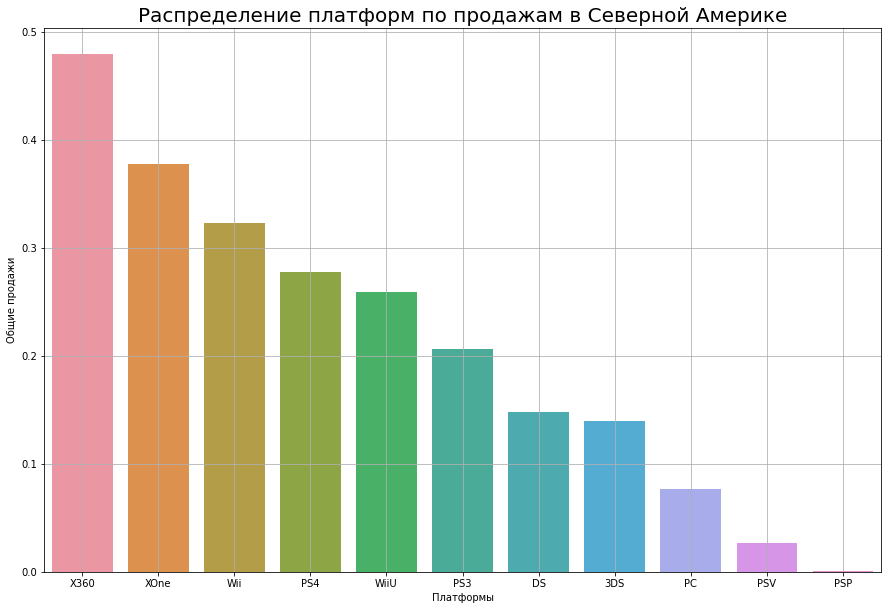

In [86]:
plt.figure(figsize=(15, 10))
plt.title('Распределение платформ по продажам в Северной Америке', fontsize=20)
sns.barplot(x=na_region_platforms.index, y=na_region_platforms['na_sales'])
plt.ylabel('Общие продажи')
plt.xlabel('Платформы')
plt.grid(True);

**Вывод:** по выведенному графику видно, что топ пять лидеров рынка - приставки X360, XOne, Wii, PS4, WiiU. Также, стоит заметить как приставка X360 отрывается от других конкурентов по продажам игр. Самой не востребованной приставкой на рынке Северной Америки является приставка PSP.

#### Самые популярные жанры игр в Северной Америке.

1. Создадим сводную таблицу, которую прогруппируем по жанрам, а вторым столцом возьмем количество проданных игр в Северной Америке.

In [87]:
na_region_genres = pd.pivot_table(na_region, 
                                 index='genre',
                                 values='na_sales').sort_values(by='na_sales', ascending=False)
                                 

na_region_genres

,na_sales
genre,
Shooter,0.616043
Platform,0.298588
Sports,0.297453
Misc,0.198906
Fighting,0.181560
Role-Playing,0.172973
Action,0.172493
Racing,0.145614
Simulation,0.099625


2. Для наглядности визуализируем данные.

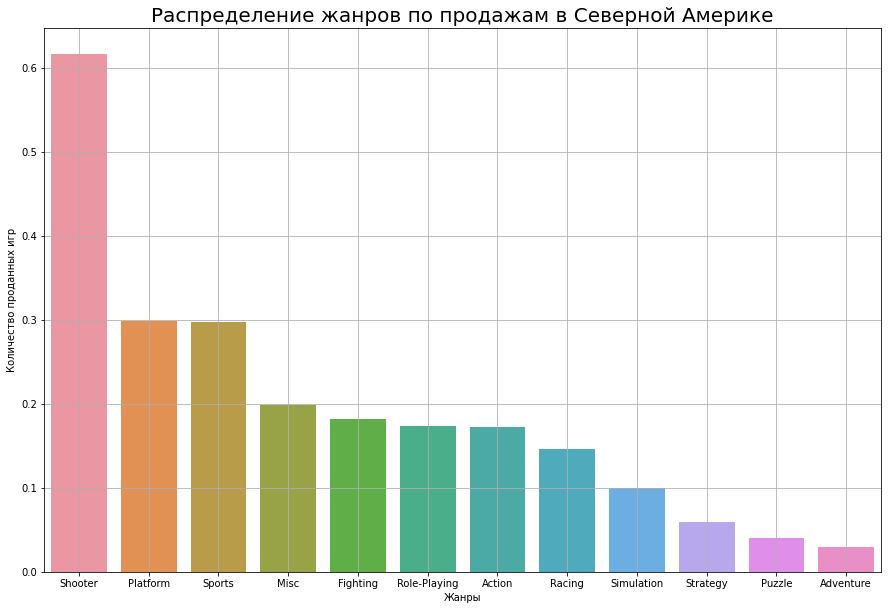

In [88]:
plt.figure(figsize=(15, 10))
plt.title('Распределение жанров по продажам в Северной Америке', fontsize=20)
sns.barplot(x=na_region_genres.index, y=na_region_genres['na_sales'])
plt.ylabel('Количество проданных игр')
plt.xlabel('Жанры')
plt.grid(True);

**Вывод:** по графику видно, что игры жанра 'Shooter' привлекают жителей данного региона больше, по сравнению с другими. Также, в топ-5 самых популярных жанров вошли - 'Platform', 'Sports', 'Misc', 'Fighting' - эти игры занимают большую часть рынка. Стоит отметить, что меньше всего в Северной Америке интересуются играми жанра 'Adventure'.

#### Влияние рейтинга ESRB на продажи в Северной Америке?

1. Создадим сводную таблицу, которую прогруппируем по столбцу 'rating', а вторым столбцом будет 'na_sales'. И отсортируем таблицу по продажам.

In [89]:
na_region_rating = pd.pivot_table(na_region,
                                 index='rating',
                                 values='na_sales').sort_values(by='na_sales', ascending=False)
na_region_rating

,na_sales
rating,
M,0.465000
E,0.284924
E10+,0.247386
T,0.159124
NR,0.081027


2. Визуализируем данные.

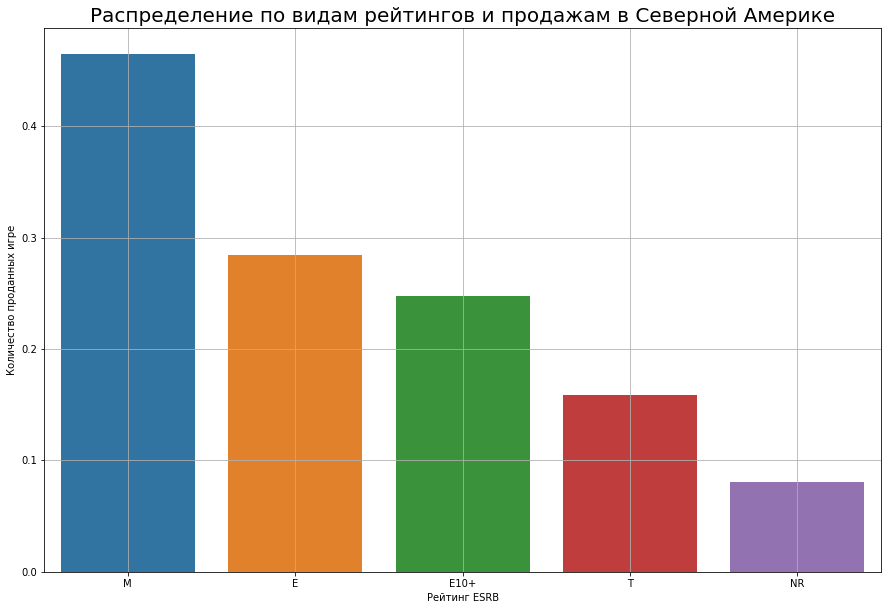

In [90]:
plt.figure(figsize=(15, 10))
plt.title('Распределение по видам рейтингов и продажам в Северной Америке', fontsize=20)
sns.barplot(x=na_region_rating.index, y=na_region_rating['na_sales'])
plt.ylabel('Количество проданных игре')
plt.xlabel('Рейтинг ESRB')
plt.grid(True);

**Вывод:** по графику видно, что топ-5 рейтингов (их всего 4) по продажам игр в Северной Америке: 'М' (Для взрослых), 'E' (Для всех), 'E10+' (Для всех с 10 лет), 'T'(Подросткам), 'NR' (Нет рейтинга). Также, стоит отметить, что 'M' - являются самым популярным рейтингом в Северной Америке и разница между следующим показателем существенна. Также стоит отметить, что достаточное количество игр, где рейтинг не проставлен. Из данного графика мы можем сделать вывод, что в Северной Америке возрастной рейтинг не так сильно влияет на продажи.

### Портрет пользователя в Европе.

#### Самые популярные платформы в Европе.

1. Создадим датафрейм, в котором будут располагать значения, связанные только с продажей игр в Европе.

In [91]:
eu_region = data_actual_years[['name', 'platform', 'genre', 'eu_sales', 'critic_score', 'user_score', 'rating']]
eu_region

,name,platform,genre,eu_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,Action,9.09,97.0,8.2,M
23,Grand Theft Auto V,X360,Action,5.14,97.0,8.1,M
31,Call of Duty: Black Ops 3,PS4,Shooter,5.86,NaN,NaN,NR
33,Pokemon X/Pokemon Y,3DS,Role-Playing,4.19,NaN,NaN,NR
34,Call of Duty: Black Ops II,PS3,Shooter,5.73,83.0,5.3,M
...,...,...,...,...,...,...,...
16427,Strawberry Nauts,PSV,Adventure,0.00,NaN,NaN,NR
16431,Aiyoku no Eustia,PSV,Misc,0.00,NaN,NaN,NR
16434,Samurai Warriors: Sanada Maru,PS3,Action,0.00,NaN,NaN,NR
16436,Haitaka no Psychedelica,PSV,Adventure,0.00,NaN,NaN,NR


2. Создадим сводную таблицу, которая будет группироваться по столбцу 'platform', вторым столбцом будет 'eu_sales', так мы увидем, какие самые популярные приставки по продажам игр в данном регионе.

In [92]:
eu_region_platforms = pd.pivot_table(eu_region,
                                    index='platform',
                                    values='eu_sales').sort_values(by='eu_sales', ascending=False)
eu_region_platforms

,eu_sales
platform,
PS4,0.359923
X360,0.253402
Wii,0.220741
PS3,0.216748
XOne,0.208866
WiiU,0.170952
PC,0.151040
DS,0.113871
3DS,0.107677


3. Визуализируем данную таблицу.

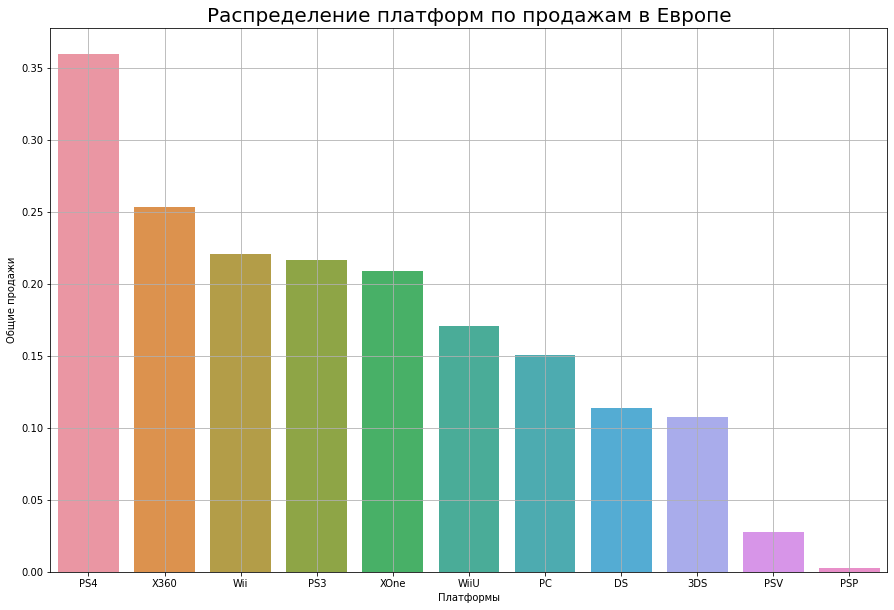

In [93]:
plt.figure(figsize=(15, 10))
sns.barplot(x=eu_region_platforms.index, y=eu_region_platforms['eu_sales'])
plt.title('Распределение платформ по продажам в Европе', fontsize=20)
plt.ylabel('Общие продажи')
plt.xlabel('Платформы')
plt.grid(True);

**Вывод:** по выведенным графикам мы видим, что в Европейском регионе по количеству продаж лидирует приставка PS4, также, в топ-5 входят такие приставки, как: X360, Wii, PS3, XOne. Самой не востребованной приставкой является - PSP.

#### Самые популярные жанры в Европе.


1. Создадим сводную таблицу, которую прогруппируем по жанрам, вторым столбцом будут продажи.

In [94]:
eu_region_genres = pd.pivot_table(eu_region,
                                 index='genre',
                                 values='eu_sales').sort_values(by='eu_sales', ascending=False)
eu_region_genres

,eu_sales
genre,
Shooter,0.482851
Sports,0.257940
Platform,0.251882
Racing,0.232544
Simulation,0.181875
Action,0.154549
Misc,0.137083
Role-Playing,0.131162
Fighting,0.098991


2. Визуализируем результат группировки.

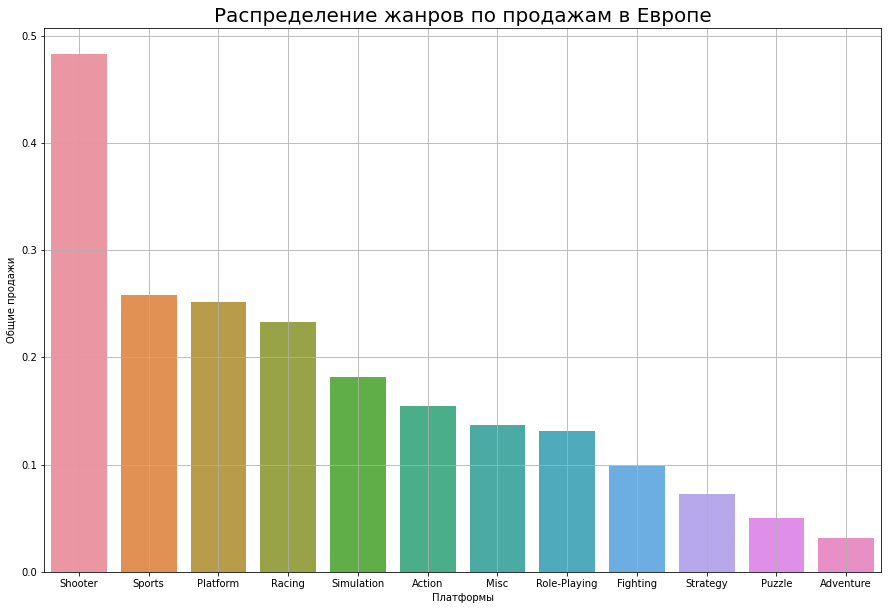

In [95]:
plt.figure(figsize=(15, 10))
sns.barplot(x=eu_region_genres.index, y=eu_region_genres['eu_sales'])
plt.title('Распределение жанров по продажам в Европе', fontsize=20)
plt.ylabel('Общие продажи')
plt.xlabel('Платформы')
plt.grid(True);

**Вывод:** по графику видно, что самый популярный жанр в Европе - 'Shooter'. Также, в топ-5 входят такие жанры, как: 'Sports', 'Platform', 'Racing', 'Simulation'. Самый невостребованный жанр - 'Adventure'.

#### Влияние рейтинга ESRB на продажи в Европе?

1. Создадим сводную таблицу, которую прогруппируем по столбцу 'rating', а вторым столбцом будет 'eu_sales'. И отсортируем таблицу по продажам.

In [96]:
eu_region_rating = pd.pivot_table(eu_region,
                                 index='rating',
                                 values='eu_sales').sort_values(by='eu_sales', ascending=False)
eu_region_rating

,eu_sales
rating,
M,0.389478
E,0.286320
E10+,0.180948
T,0.126959
NR,0.071765


2. Визуализируем данные.

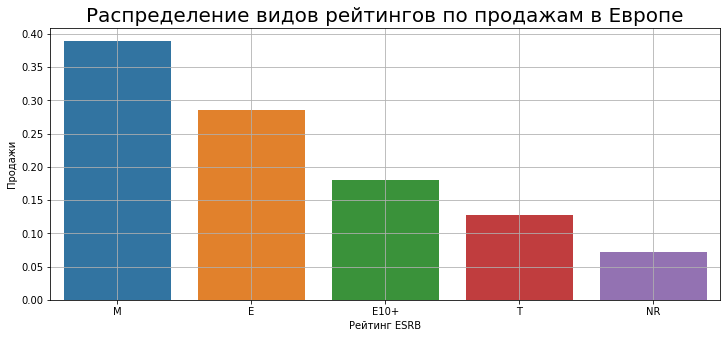

In [97]:
plt.figure(figsize=(12,5))
sns.barplot(x=eu_region_rating.index, y=eu_region_rating['eu_sales'])
plt.title('Распределение видов рейтингов по продажам в Европе', fontsize=20)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.grid(True)


**Вывод:** по графику видно, что самое большое число проданных игр относится к рейтингу 'M' (Для взрослых), также в топ-5 входят: 'E'(Для всех), 'E10+' (Для всех от 10 лет и старше), 'T' (Подросткам) и 'NR' (Нет рейтинга). Из-за того, что самый популярный жанр в Европе является шутер, где много перестрелок, крови и т.д, поэтому такое большое количество игр с этим рейтингом. И как мы понимаем, продажи игр не так сильно зависят от рейтингов в Европе.

### Портрет пользователя в Японии.

#### Самые популярные платформы в Японии.

1. Создадим датафрейм, в котором будут располагать значения, связанные только с продажей игр в Японии.

In [98]:
jp_region = data_actual_years[['name', 'platform', 'genre', 'jp_sales', 'critic_score', 'user_score', 'rating']]

2. Создадим сводную таблицу, которую прогруппируем по столбцу 'platform'. Вторым столбцом будет 'jp_sales', по нему мы отсортируем таблицу по убыванию.

In [99]:
jp_region_platforms = pd.pivot_table(jp_region,
                                     index='platform',
                                     values='jp_sales').sort_values(by='jp_sales', ascending=False)
jp_region_platforms

,jp_sales
platform,
3DS,0.221692
DS,0.120000
WiiU,0.088503
PS3,0.071728
Wii,0.062778
PSP,0.060520
PSV,0.051192
PS4,0.040714
X360,0.005361


3. На основе таблицы, визуализируем данные.

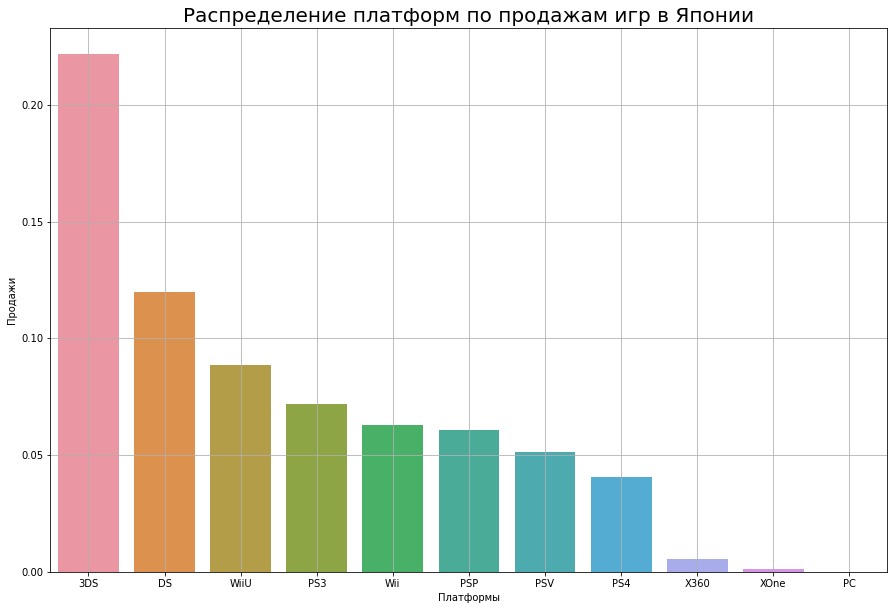

In [100]:
plt.figure(figsize=(15,10))
sns.barplot(x=jp_region_platforms.index, y=jp_region_platforms['jp_sales'])
plt.title('Распределение платформ по продажам игр в Японии', fontsize=20)
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.grid(True)

**Вывод:** по графику видно, что топ-5 платформ в Японии: 3DS, DS, WiiU, PS3, Wii. Причём 3DS - является лидером среди других приставок и заметно выделяется от других. Самой не популярной платформой в Японии является - PC.

#### Самые популярные жанры в Японии.

In [101]:
jp_region_genres = pd.pivot_table(jp_region,
                                 index='genre',
                                 values='jp_sales').sort_values(by='jp_sales', ascending=False)
jp_region_genres

,jp_sales
genre,
Role-Playing,0.176865
Simulation,0.130125
Platform,0.101529
Fighting,0.086606
Puzzle,0.076429
Misc,0.066979
Action,0.051212
Strategy,0.040563
Shooter,0.039277


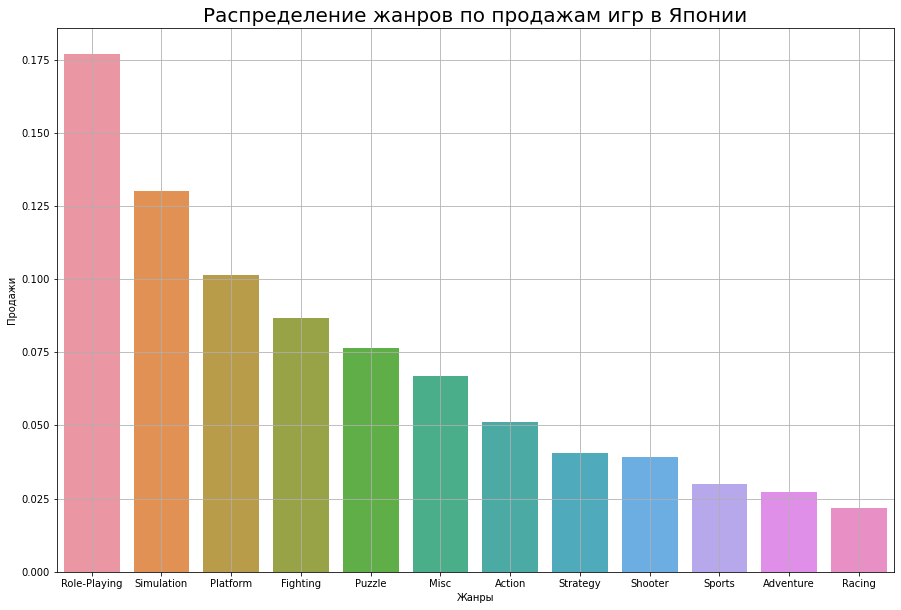

In [102]:
plt.figure(figsize=(15,10))
sns.barplot(x=jp_region_genres.index, y=jp_region_genres['jp_sales'])
plt.title('Распределение жанров по продажам игр в Японии', fontsize=20)
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.grid(True)

**Вывод:** по графику видно, что самым популярным жанром игр в Японии является 'Role-Playing'. Также, в топ-5 входят: 'Simulation', 'Platform', 'Fighting', 'Puzzle'. Самым непопулярным является жанр 'Racing'.

#### Влияние рейтинга ESRB на продажи в Японии?

1. Создадим сводную таблицу, которую прогруппируем по столбцу 'rating', а вторым столбцом будет 'jp_sales'. И отсортируем таблицу по продажам.

In [103]:
jp_region_rating = pd.pivot_table(jp_region,
                                 index='rating',
                                 values='jp_sales').sort_values(by='jp_sales', ascending=False)
jp_region_rating

,jp_sales
rating,
NR,0.085365
E,0.071904
T,0.063285
M,0.042570
E10+,0.026765


2. На основе таблицы, визуализируем данные.

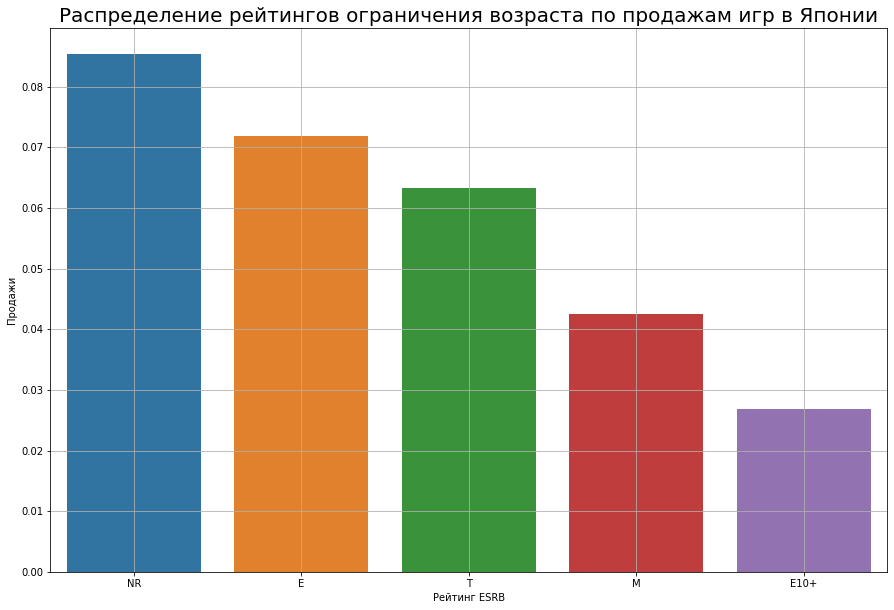

In [104]:
plt.figure(figsize=(15,10))
sns.barplot(x=jp_region_rating.index, y=jp_region_rating['jp_sales'])
plt.title('Распределение рейтингов ограничения возраста по продажам игр в Японии', fontsize=20)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.grid(True)

**Вывод:** по графику видно, что самое большое количество продаж с рейтингом 'NR' (Нет рейтинга). Также, в топ-5 входят: 'E'(Для всех), 'T'(Подросткам), 'M' (Для взрослых), 'E10+'(Для всех от 10 лет и старше). Стоит заметить, что на графике преобладает рейтинг 'NR'(Нет рейтинга), поэтому я предполагаю, что в Японии используются еще другие рейтинги для определения возрастного ограничения. Исходя из данных в таблицы, мы можем сделать вывод, что в Японии продажи зависят от ограничений по возрасту, так как лидеры по продажам исключительно игры относящиеся 'Для всех'. 

**Общий вывод по разделу:** 


**Портрет пользователя:**
1) Северная Америка:
- Топ-5 платформ: X360, XOne, Wii, PS4, WiiU. 
- Топ-5 жанров: 'Shooter', 'Platform', 'Sports', 'Misc', 'Fighting'
- Топ-5 рейтингов по ограничению возраста: М' (Для взрослых), 'E' (Для всех), 'E10+' (Для всех с 10 лет), 'T'(Подросткам), 'NR' (Нет рейтинга).
- Ограничение по возрасту не влияет на продажи.


2) Европа:
- Топ-5 платформ: PS4, X360, Wii, PS3, XOne
- Топ-5 жанров: 'Shooter', 'Sports', 'Platform', 'Racing', 'Simulation'
- Топ-5 рейтингов по ограничению возраста: 'M' (Для взрослых), также в топ-5 входят: 'E'(Для всех), 'E10+' (Для всех от 10 лет и старше), 'T' (Подросткам) и 'NR' (Нет рейтинга).
- Ограничение по возрасту не влияет на продажи.

3) Япония:
- Топ-5 платформ: 3DS, DS, WiiU, PS3, Wii.
- Топ-5 жанров: Role-Playing, Simulation, Platform, 'Fighting', 'Puzzle'.
- Топ-5 рейтингов по ограничению возраста: 'NR' (Нет рейтинга), 'E'(Для всех), 'T'(Подросткам), 'E10+'(Для всех от 10 лет и старше), 'M' (Для взрослых).
- Ограничение по возрасту влияет на продажи.


## Шаг 5. Проверка гипотез.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

1. В первую очередь создадим два датафрейма. В первом датафрейме будут только оценки для PC-игр. Во втором датафрейме - пользовательские оценки для XBOX ONE-игр.

In [105]:
score_pc = data[data['platform'] == 'PC']
score_pc = score_pc[['name', 'platform', 'user_score']]
user_score_pc = score_pc['user_score']
user_score_pc = user_score_pc.dropna()
user_score_pc

85       7.6
138      7.3
191      4.0
217      8.2
283      9.1
        ... 
16405    8.1
16416    7.6
16420    5.8
16426    7.2
16429    5.8
Name: user_score, Length: 754, dtype: float64

In [106]:
score_xone = data[data['platform'] == 'XOne']
score_xone = score_xone[['name', 'platform', 'user_score']]
user_score_xone = score_xone['user_score']
user_score_xone = user_score_xone.dropna()
user_score_xone

165      7.9
179      5.4
241      6.4
269      6.2
372      4.1
        ... 
16268    6.8
16321    6.0
16354    8.2
16367    6.6
16384    6.7
Name: user_score, Length: 182, dtype: float64

2. Так как в гипотезе сравнивается две генеральные совокупности, то для проверки нулевой гипотезы (H0), что пользовательские рейтинги платформ Xbox One и PC одинаковые, воспользуемся гипотезой о равенстве средних двух генеральных совокупностей (метод: ttest_ind).

* Так как, выборки разные по размеру, параметр equal_var равен значению False.
* Альфа-уровень часто устанавливается равным 0.05, поэтому это значение и возьмём.

In [107]:
# Гипотеза H0 = рейтинги платформ Xbox One и PC одинаковые.
# Альтернативная гипотеза H1 = рейтинги платформ Xbox One и PC разные.

alpha = 0.05

results = st.ttest_ind(user_score_pc, user_score_xone, alternative='two-sided', equal_var=False)

print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, рейтинги платформ Xbox One и PC разные.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, рейтинги платформ Xbox One и PC одинаковые.')

p-значение: 4.903138894022829e-06
Отвергаем нулевую гипотезу, рейтинги платформ Xbox One и PC разные.


**Вывод:** по выведенным данным мы можем сделать вывод, что рейтинги платформ Xbox One и PC разные, нулевая гипотеза отвергается.

### Средние пользовательские рейтинги жанров Action и Sports разные?

1. В первую очередь создадим два датафрейма. В первом датафрейме будут только оценки для игр жанра Action. Во втором датафрейме будут только оценки для игр жанра Sports.

In [108]:
genre_action = data.query('genre == "Action"')
genre_action = genre_action[['user_score']]
genre_action = genre_action.dropna()
genre_action

,user_score
16,8.2
17,9.0
23,8.1
24,8.7
38,8.5
...,...
16376,8.5
16378,5.1
16384,6.7
16387,2.4


In [109]:
genre_sports = data.query('genre == "Sports"')
genre_sports = genre_sports[['user_score']]
genre_sports = genre_sports.dropna()
genre_sports

,user_score
0,8.0
3,8.0
13,7.7
15,7.4
77,4.3
...,...
16176,4.5
16243,1.4
16252,6.9
16270,9.5


2. Так как в гипотезе сравнивается две генеральные совокупности, то для проверки нулевой гипотезы (H0), что пользовательские рейтинги игр жанра Action и Sports одинаковые, воспользуемся гипотезой о равенстве средних двух генеральных совокупностей (метод: ttest_ind).

* Так как, выборки разные по размеру, параметр equal_var равен значению False.
* Альфа-уровень часто устанавливается равным 0.05, поэтому это значение и возьмём.

In [110]:
# Гипотеза H0 = Средние пользовательские рейтинги жанров Action и Sports одинаковые.
# Альтернативная гипотеза H1 = Средние пользовательские рейтинги жанров Action и Sports Разные.

alpha = 0.05 

results = st.ttest_ind(genre_action, genre_sports, alternative='two-sided', equal_var=False)

print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports разные')
else:
    print('Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports одинаковые.')

p-значение: [0.07751672]
Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports одинаковые.


**Вывод:** по выведенным данным мы можем сделать вывод, что рейтинги игр жанра Action и Sports одинаковые, поэтому наша нулевая гипотеза не отвергается.

**Общий вывод по разделу:**
* Средние пользовательские рейтинги платформ Xbox One и PC разные.
* Средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Шаг 6. Общий вывод.

**1. В ходе исследования данных, связанных с интернет-магазином игр «Стримчик» была проделана большая работа:**
* В первую очередь мы предобработали все данные в исходном датафрейме. Были удалены явные дубликаты. В тех столбцах, в которых возможно, были изменены типы данных.
* Названия столбцов были изменены на строчные.
* Также, посчитали суммарные продажи и добавили их в новый столбец 'sum_sales'.


**2. Исследовательский анализ данных:**


Мы смогли определить:
- Самый популярный год по выпуску игр - 2008 год.
- На приставки PS2, X360, PS3, Wii, DS, PS - было продано больше всего игр.
- Актуальный период приставок - 11 лет.
- Потенциально прибыльные приставки: PC, PS4, XBOX, OneNintendo, 3DSNintendo, WiiU, PSV.
- Количество продаж сильно зависит от оценок критиков.
- Самые популярные жанры по продажам - 'Shooter' (сильно выделяется по отношению к другим), 'Platform', 'Sports', 'Role-Playing', 'Simulation'.


**3. Составили портрет пользователя каждого региона:**


1) Северная Америка:

Топ-5 платформ: X360, XOne, Wii, PS4, WiiU.
Топ-5 жанров: 'Shooter', 'Platform', 'Sports', 'Misc', 'Fighting'
Топ-5 рейтингов по ограничению возраста: М' (Для взрослых), 'E' (Для всех), 'E10+' (Для всех с 10 лет), 'T'(Подросткам), 'NR' (Нет рейтинга).
Ограничение по возрасту не влияет на продажи.


2) Европа:

Топ-5 платформ: PS4, X360, Wii, PS3, XOne
Топ-5 жанров: 'Shooter', 'Sports', 'Platform', 'Racing', 'Simulation'
Топ-5 рейтингов по ограничению возраста: 'M' (Для взрослых), также в топ-5 входят: 'E'(Для всех), 'E10+' (Для всех от 10 лет и старше), 'T' (Подросткам) и 'NR' (Нет рейтинга).
Ограничение по возрасту не влияет на продажи.


3) Япония:

Топ-5 платформ: 3DS, DS, WiiU, PS3, Wii.
Топ-5 жанров: Role-Playing, Simulation, Platform, 'Fighting', 'Puzzle'.
Топ-5 рейтингов по ограничению возраста: 'NR' (Нет рейтинга), 'E'(Для всех), 'T'(Подросткам), 'E10+'(Для всех от 10 лет и старше), 'M' (Для взрослых).
Ограничение по возрасту влияет на продажи.


**4. Изучили гипотезы:**


* Средние пользовательские рейтинги платформ Xbox One и PC разные.
* Средние пользовательские рейтинги жанров Action и Sports одинаковые.


**5. Рекламная компания:**

Отдел аналитики предлагает рассмотреть вариант заказа рекламной компании игр на 2017 год:


Платформы: PS4, XOne - Северная Америка, 3DS - Япония.

Жанры: Shooter, Platform - Северная Америка, Европа, Япония. Role-Playing - Япония.

Возрастной рейтинг: 'М' (Для взрослых), 'E' (Для всех) - Северная Америка, Европа. 'E' (Для всех) - Япония.


Все приведенные данные являются лидерами по показателям в указанных регионах, поэтому отдел аналитики советует рассмотреть заказ этой рекламной компании на 2017 год.


